<a href="https://colab.research.google.com/github/uomerozkaya/HousePricePrediction/blob/main/UmutOmerOzkaya_HouseRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Let's add the libraries**

In [ ]:
#!pip install hvplot
import pandas as pd
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
import seaborn as sns
from scipy import stats
import csv
import statistics
#import hvplot.pandas
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/home_data.csv")
data.head(100000)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Histograms about data

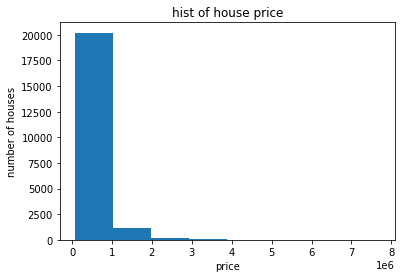

In [ ]:
plt.hist(data["price"],bins= 8)
plt.xlabel("price")
plt.ylabel("number of houses")
plt.title("hist of house price")
plt.show()

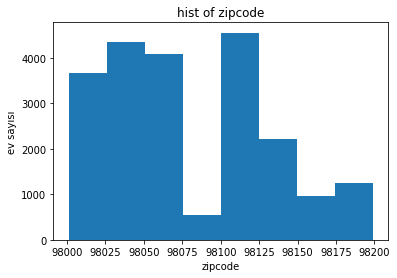

In [ ]:
plt.hist(data["zipcode"],bins= 8)
plt.xlabel("zipcode")
plt.ylabel("ev sayısı")
plt.title("hist of zipcode")
plt.show()

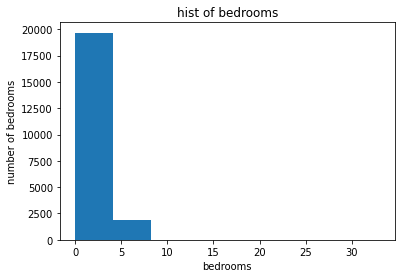

In [ ]:
plt.hist(data["bedrooms"],bins= 8)
plt.xlabel("bedrooms")
plt.ylabel("number of bedrooms")
plt.title("hist of bedrooms")
plt.show()

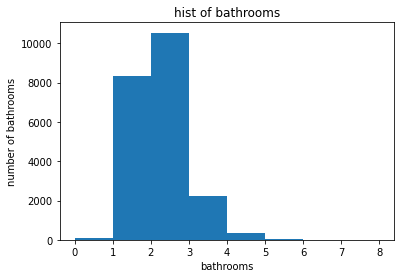

In [ ]:
plt.hist(data["bathrooms"],bins= 8)
plt.xlabel("bathrooms")
plt.ylabel("number of bathrooms")
plt.title("hist of bathrooms")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


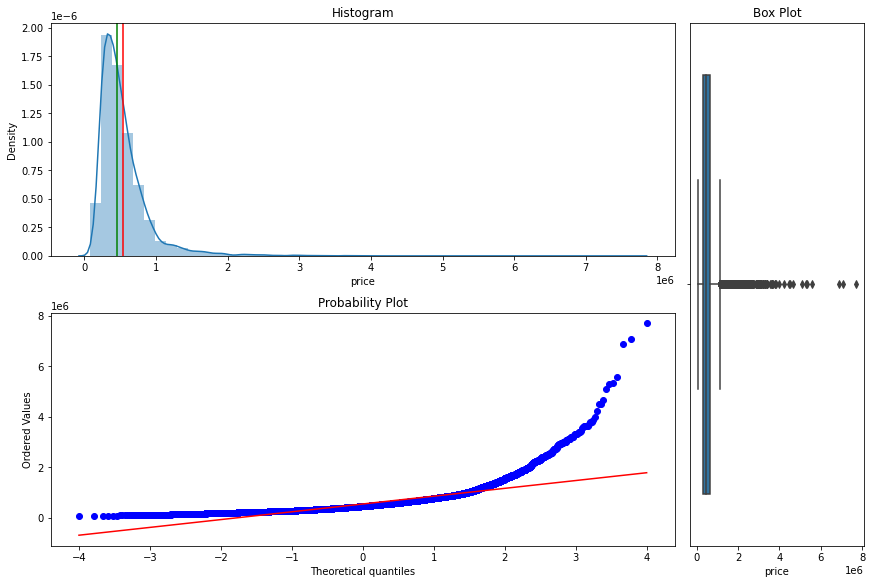

In [ ]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(data, 'price')

# En pahalı bölge

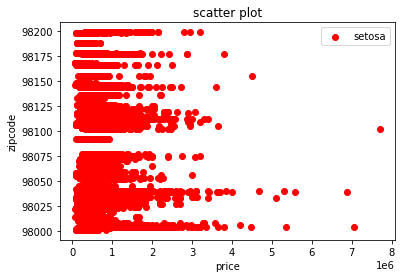

In [ ]:
plt.scatter(data.price,data.zipcode,color="red",label="setosa")
plt.legend()
plt.xlabel("price")
plt.ylabel("zipcode")
plt.title("scatter plot")
plt.show()

In [ ]:
statistics.mean(data.price)

540088.1419053348

In [ ]:
b = []
i = 98001
while i<= 98199:
  y = data[data.zipcode == i]
  b.append(np.mean(y.price))
  i = i + 1
print(b)

[280804.6906077348, 234284.0351758794, 294111.27857142856, 1355927.0977917982, 810164.880952381, 859684.7630522088, 617105.085106383, 645507.3780918728, nan, 423665.99, 490351.4666666667, nan, nan, 455617.1129032258, nan, nan, nan, nan, 424788.74736842106, nan, nan, 315709.30341880344, 286732.79158316634, 580526.7901234567, nan, nan, 616990.5873786408, 462480.035335689, 612653.6105919003, 296187.98046875, 300539.8905109489, 251296.24, 803719.5324074074, 521652.8587155963, nan, nan, nan, 366867.6, 2160606.6, 1194230.0035460992, nan, 311632.10583941604, nan, nan, 439471.0814479638, nan, nan, nan, nan, nan, nan, 645231.4529616724, 678163.0592592593, nan, 304262.1082089552, 420890.54926108377, nan, 353608.63516483514, 493552.5213675214, nan, nan, nan, nan, nan, 527961.2032258065, nan, nan, nan, nan, 487479.6271186441, nan, 569958.4578754578, nan, 685605.775510204, 790576.6685236769, nan, 682774.8787878788, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 334921.0626780

In [ ]:
max(b)

2160606.6

In [ ]:
for i in b:
  if i == 2160606.6:
    print(b.index(i))

38


In [ ]:
adress = data[data.zipcode == 98039]
statistics.mean(adress.price)

2160606.6

#'sqft_living’ özniteliğine göre 2000 sqft’ten büyük ve 4000 sqft’ten küçük olan evleri seçin.

In [ ]:
data1 = data[data.sqft_living <= 4000]
data2 = data[data.sqft_living >= 2000]
int_df = pd.merge(data1, data2)
int_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.221000e+03,9.221000e+03,9221.000000,9221.000000,9221.000000,9.221000e+03,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000,9221.000000
mean,4.637049e+09,6.511986e+05,3.829086,2.513990,2663.281314,1.847708e+04,1.640549,0.009435,0.338141,3.393450,8.223295,2241.422514,421.858801,1978.472400,102.032318,98069.281314,47.563068,-122.184519,2355.442034,15434.426526
std,2.894644e+09,3.122735e+05,0.805259,0.535565,504.000449,4.533898e+04,0.490678,0.096680,0.905375,0.632847,1.000501,674.688271,501.551358,27.425217,439.810063,50.902800,0.135607,0.139510,596.482231,30343.765114
min,1.000102e+06,1.942500e+05,0.000000,0.000000,2000.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,5.000000,810.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000,399.000000,1062.000000
25%,2.126059e+09,4.350000e+05,3.000000,2.250000,2240.000000,5.800000e+03,1.000000,0.000000,0.000000,3.000000,8.000000,1680.000000,0.000000,1962.000000,0.000000,98030.000000,47.478800,-122.296000,1940.000000,5746.000000
50%,4.019301e+09,5.950000e+05,4.000000,2.500000,2550.000000,8.335000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,2220.000000,0.000000,1984.000000,0.000000,98056.000000,47.577500,-122.188000,2310.000000,8140.000000
75%,7.504011e+09,7.800000e+05,4.000000,2.750000,3000.000000,1.276000e+04,2.000000,0.000000,0.000000,4.000000,9.000000,2690.000000,861.000000,2001.000000,0.000000,98112.000000,47.673700,-122.089000,2730.000000,11568.000000
max,9.839301e+09,3.100000e+06,11.000000,5.750000,4000.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,12.000000,4000.000000,2000.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.321000,5790.000000,560617.000000


In [ ]:
len(int_df)/len(data)

0.4266413732475825

# sqft_living Linear Regression

In [ ]:
X = data[['sqft_living']]
y = data['price']

**We divide the data into training and testing.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8 ,test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
   ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print(lin_reg.intercept_)

537768.0477732794


**Coefficient of our model**

In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,253632.146222


In [ ]:
pred = lin_reg.predict(X_test)

**Values of MAE,MSE,RMSE and R2 Square**

In [ ]:
from sklearn import metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


**Values of MAE,MSE,RMSE and R2 Square**


**Ortalama mutlak hata(MAE)** iki sürekli değişken arasındaki farkın ölçüsüdür. MAE, her gerçek değer ile veriye en iyi uyan çizgi arasındaki ortalama dikey mesafedir.

**MAE** değeri 0’dan ∞’a kadar değişebilir. Negatif yönelimli puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir.

Basitçe, **ortalama kare hata(MSE)** bir regresyon eğrisinin bir dizi noktaya ne kadar yakın olduğunu söyler.

**MSE**, bir makine öğrenmesi modelinin, tahminleyicinin performansını ölçer, her zaman pozitif değerlidir ve MSE değeri sıfıra yakın olan tahminleyicilerin daha iyi bir performans gösterdiği söylenebilir.

**RMSE** makine öğrenmesi modelinin, tahminleyicinin tahmin ettiği değerler ile gerçek değerleri arasındaki uzaklığın bulunmasında sıklıkla kullanılan, hatanın büyüklğünü ölçen kuadratik bir metriktir. 

Negatif yönelimli puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir. **RMSE** değerinin sıfır olması modelin hiç hata yapmadığı anlamına gelir.

**R²**, verilerin yerleştirilmiş regresyon hattına ne kadar yakın olduğunun istatistiksel bir ölçüsüdür.

**R2‘ın** yüksek olması regresyon model uyumunun iyi olduğunu gösterir. Yukarıda da söylediğimiz gibi tüm noktalar regresyon doğrusu üzerinde olsaydı mükemmel bir modelimiz olurdu. 

**R-kare**, bir regresyon modelinin verilerinize yeterli bir uyum sağlayıp sağlamadığını göstermez. İyi bir model düşük bir R-kare değerine sahip olabilir. Öte yandan, taraflı bir model yüksek bir R-kare değerine sahip olabilir!


In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 177867.54159335024
MSE: 76484977594.78212
RMSE: 276559.17557510565
R2 Square 0.4940690470123985
__________________________________
Train set evaluation:
_____________________________________
MAE: 172364.8004156447
MSE: 66319347926.55737
RMSE: 257525.43161124372
R2 Square 0.4923838367820874
__________________________________


**Our Regression Curve**

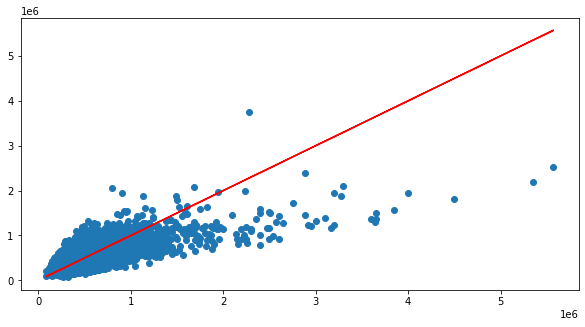

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, test_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

# "advanced_features" Linear Regression Model

In [ ]:
advanced_features = data[['sqft_living','bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode','condition','grade',
                         'waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']]
y = data['price']

****We divide the data into training and testing.****

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(advanced_features, y,train_size = 0.8 ,test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_regs = LinearRegression(normalize=True)
lin_regs.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print(lin_regs.intercept_)

537768.0477732854


**Coefficients of our model**

In [ ]:
coeff_df = pd.DataFrame(lin_regs.coef_, advanced_features.columns, columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,52966.308728
bedrooms,-31978.583442
bathrooms,34170.652713
sqft_living,52966.308728
sqft_lot,3450.664533
floors,3801.315940
zipcode,-29448.638601
condition,15983.536520
grade,110674.786562
waterfront,47457.604054


In [ ]:
pred = lin_regs.predict(X_test)

**Values of MAE,MSE,RMSE and R2 Square**


**Ortalama mutlak hata(MAE)** iki sürekli değişken arasındaki farkın ölçüsüdür. MAE, her gerçek değer ile veriye en iyi uyan çizgi arasındaki ortalama dikey mesafedir.

**MAE** değeri 0’dan ∞’a kadar değişebilir. Negatif yönelimli puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir.

Basitçe, **ortalama kare hata(MSE)** bir regresyon eğrisinin bir dizi noktaya ne kadar yakın olduğunu söyler.

**MSE**, bir makine öğrenmesi modelinin, tahminleyicinin performansını ölçer, her zaman pozitif değerlidir ve MSE değeri sıfıra yakın olan tahminleyicilerin daha iyi bir performans gösterdiği söylenebilir.

**RMSE** makine öğrenmesi modelinin, tahminleyicinin tahmin ettiği değerler ile gerçek değerleri arasındaki uzaklığın bulunmasında sıklıkla kullanılan, hatanın büyüklğünü ölçen kuadratik bir metriktir. 

Negatif yönelimli puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir. **RMSE** değerinin sıfır olması modelin hiç hata yapmadığı anlamına gelir.

**R²**, verilerin yerleştirilmiş regresyon hattına ne kadar yakın olduğunun istatistiksel bir ölçüsüdür.

**R2‘ın** yüksek olması regresyon model uyumunun iyi olduğunu gösterir. Yukarıda da söylediğimiz gibi tüm noktalar regresyon doğrusu üzerinde olsaydı mükemmel bir modelimiz olurdu. 

**R-kare**, bir regresyon modelinin verilerinize yeterli bir uyum sağlayıp sağlamadığını göstermez. İyi bir model düşük bir R-kare değerine sahip olabilir. Öte yandan, taraflı bir model yüksek bir R-kare değerine sahip olabilir!



In [ ]:
test_pred = lin_regs.predict(X_test)
train_pred = lin_regs.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 127493.34488251447
MSE: 45173046173.71731
RMSE: 212539.51673445883
R2 Square 0.7011904426369228
__________________________________
Train set evaluation:
_____________________________________
MAE: 125033.16497490862
MSE: 39311882433.30825
RMSE: 198272.24322458313
R2 Square 0.699102184301204
__________________________________


**Our Regression Curve**

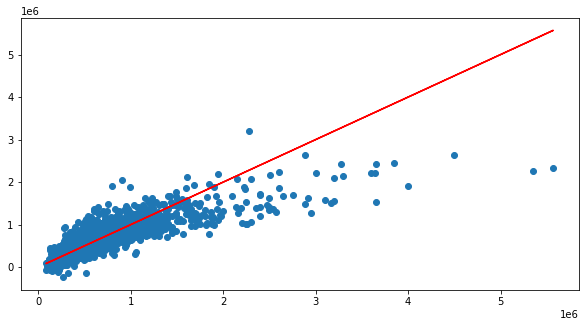

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, test_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
data[data.id == 5309101200]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [ ]:
dfyt = pd.DataFrame(y_train)
dfyt[dfyt.price == 620000]
train_pred[1055]

1097344.9962792755

In [ ]:
data[data.id == 1925069082]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [ ]:
dfyt[dfyt.price == 2200000]
train_pred[1362]

841753.3116908291

# Polynomial Regression for our dataset

## for degree = 2 ;

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(advanced_features, y, test_size=0.2, random_state = 0)

In [ ]:
"Creates a polynomial regression model for the given degree"
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


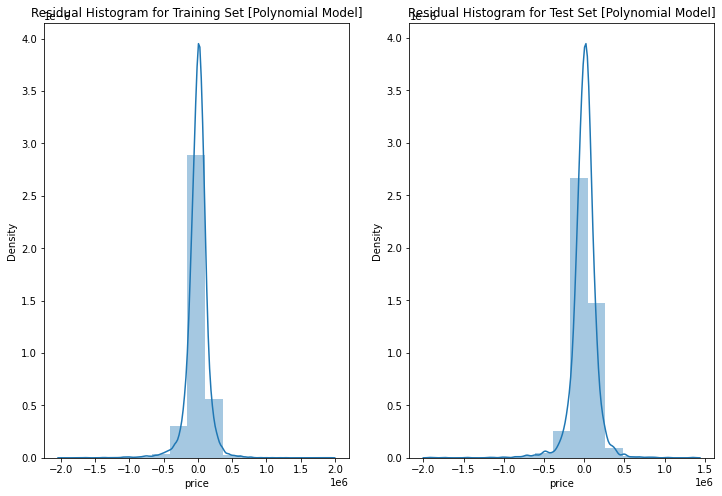

In [ ]:
plt.figure(figsize=(12,8))
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


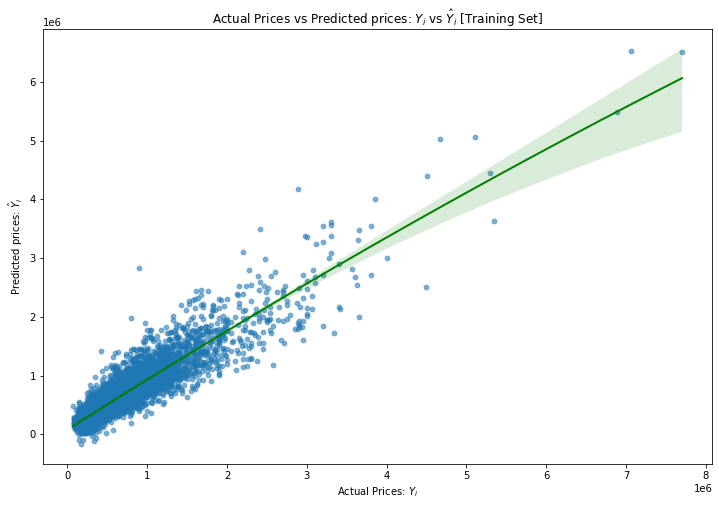

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y_train, y_train_predicted, alpha=0.4)
sns.regplot(y_train, y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")

 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


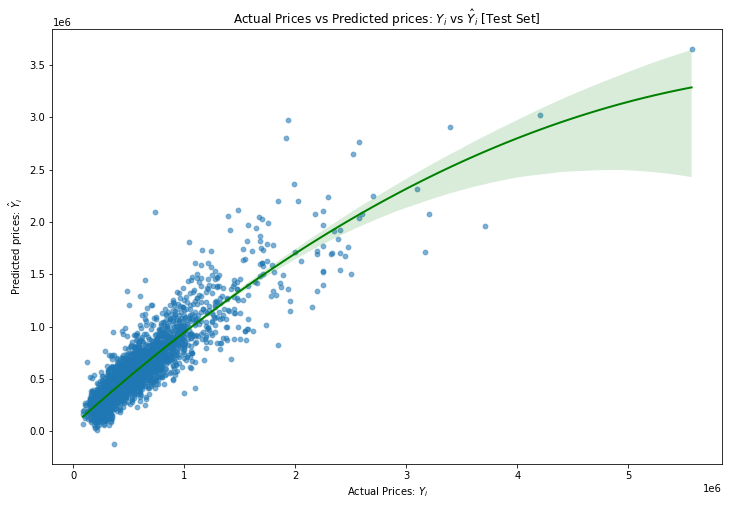

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y_test, y_test_predicted, alpha=0.4)
sns.regplot(y_test, y_test_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

**The polynomial model performance for the training set**

In [ ]:
# evaluating the model on training data-set
from sklearn.metrics import mean_squared_error, r2_score
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the training set
RMSE of training set is 152119.3504647789
R2 score of training set is 0.8331663401340639


**The polynomial model performance for the test set**

In [ ]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 152418.82880354533
R2 score of test set is 0.8046529932323776


In [ ]:
data[data.id == 5309101200]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [ ]:
df = pd.DataFrame(y_train)
df[df.price == 620000]

,price
20558,620000
1324,620000
5960,620000
1142,620000
19410,620000
4919,620000
5270,620000
19390,620000
17208,620000
6873,620000


In [ ]:
y_train_predicted[1054]

606536.7964401245

In [ ]:
data[data.id == 1925069082]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [ ]:
df = pd.DataFrame(y_train)
df[df.price == 2200000]

,price
15180,2200000
11748,2200000
14232,2200000
14385,2200000
1361,2200000
6233,2200000


In [ ]:
y_train_predicted[1361]

964931.6592597961

## for degree = 5;

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (17290, 1)
X_test dimension=  (4323, 1)
y_train dimension=  (17290,)
y_train dimension=  (4323,)


In [ ]:
poly = PolynomialFeatures(degree = 5) 
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train)

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
from sklearn import linear_model

In [ ]:
lm = linear_model.LinearRegression() 
lm.fit(X_poly, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.39088527303980924


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


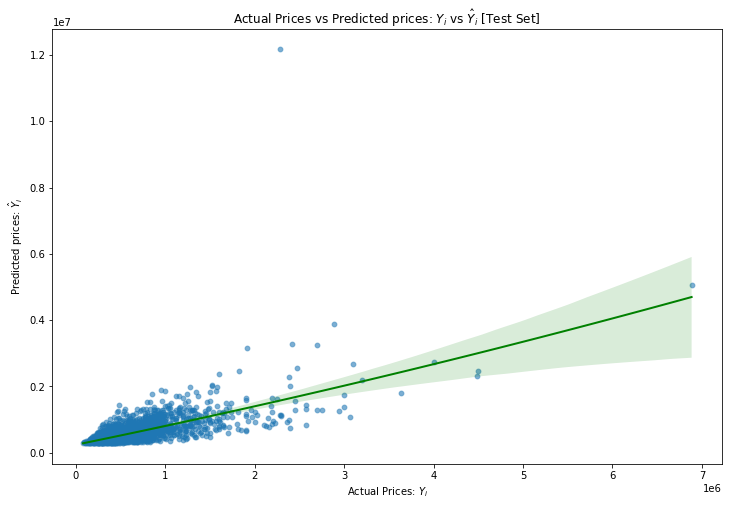

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y_test, predictions, alpha=0.4)
sns.regplot(y_test, predictions, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 481744.424142369
R2 score of test set is -0.7275701382530648
